In [ ]:
import pandas as pd
import nltk
import statistics
import numpy as np
nltk.download('punkt')
import matplotlib.pyplot as plt
import string
from nltk.translate.bleu_score import sentence_bleu
import seaborn as sns
import glob
import os


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


ERROR: Could not find a version that satisfies the requirement pinc (from versions: none)
ERROR: No matching distribution found for pinc


In [ ]:
# ! gdown --id 1_C260zgutx-BXmMUkDYfhJTqlDLCsHPI
# ! unzip FinalDataset.zip



/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Access denied with the following error:

 	Cannot retrieve the public link of the file. You may need to change
	the permission to 'Anyone with the link', or have had many accesses. 

You may still be able to access the file from the browser:

	 https://drive.google.com/uc?id=1_C260zgutx-BXmMUkDYfhJTqlDLCsHPI 

unzip:  cannot find or open FinalDataset.zip, FinalDataset.zip.zip or FinalDataset.zip.ZIP.


In [ ]:
# Load the three datasets
dataset1 = pd.read_csv("buet_whole_1.csv")
dataset2 = pd.read_csv("buet_whole_2.csv")
dataset3 = pd.read_csv("buet_whole_3.csv")

# bnpc_train = pd.read_csv("BnPC_train.csv")
# bnpc_test = pd.read_csv("BnPC_test.csv")
# bnpc_val = pd.read_csv("BnPC_val.csv")

In [ ]:
# Merge the datasets
# merged_dataset = pd.concat([dataset1, dataset2, dataset3])
# merged_dataset
# dataset3

# merged_dataset.to_csv("indic_whole_3.csv", index=False)
# merged_dataset

,sentence1,sentence2,label
0,এই টানা তিনটি টুর্নামেন্টে ইংল্যান্ড বাদ পড়ে ...,ধারাবাহিকভাবে তিনটি প্রতিযোগিতায় কোয়ার্টার ফ...,1
1,"বিবিসির বিশ্লেষক মার্ক লোয়েন বলছেন, প্রেসিডেন...",বিবিসি বিশ্লেষক মার্ক লোয়েন বলেছেন প্রেসিডেন্...,1
2,মাঝে কিছু সময় আলজেরিয়াতে উদ্দেশ্যহীন যাযাবর ...,"আলজেরিয়ায় কিছুদিন থাকার পর, তিনি বিস্ক্রায় ...",1
3,অথচ গুরুত্বপূর্ণ দিকে মনোযোগ না দিয়ে আপনারা চ...,"কিন্তু গুরুত্বপূর্ণ বিষয়ে মনোযোগ না দিয়ে, আপ...",1
4,"তারা ছিলেন ক্ষমতাহীন, অক্ষম।","তারা ক্ষমতাহীন, অযোগ্য ছিল।",1
...,...,...,...
8782,"আজারবাইজান-আর্মেনিয়া সংঘর্ষ, হেলিকপ্টার ভূপাতিত",বিরোধপূর্ণ অঞ্চল নিয়ে যুদ্ধে জড়াল আর্মেনিয়া-আজ...,0
8783,সরকারি অনুদানের প্রীতিলতা হচ্ছেন তিশা,ব্রিটিশবিরোধী বিপ্লবী নারী চরিত্রে পরীমনি,0
8784,বিশ্বব্যাপী প্রতিনিয়ত মহামারি করোনাভাইরাসে আক...,ভারতে সংক্রমণ ৬০ লাখ ছুঁই ছুঁই,0
8785,নতুন সিনেমায় ‘প্রীতিলতা’ হচ্ছেন পরী মণি,সিনেমা হলের উন্নয়নে তহবিল হচ্ছে: তথ্যমন্ত্রী,0


In [ ]:
bnpc_val

,sentence1,sentence2,Shakirul,Sourav,Nobin,Shak Div,Sou Div,Nob Div,Average,Distinct,Unanimous,label,Majority Voting
0,রায়ের পর হাসছিলেন রিফাত ফরাজীরা,আদালত থেকে আর বাড়ি যাওয়া হলো না মিন্নির,0,0.0,1.0,0.0,0.0,0.00,0.000000,0,1,0,0.0
1,রায়ের পর হাসছিলেন রিফাত ফরাজীরা,রিফাত হত্যায় স্ত্রী মিন্নিসহ ৬ জনের ফাঁসির রায়,0,0.0,1.0,0.0,0.0,0.00,0.000000,0,1,0,0.0
2,রায়ের পর হাসছিলেন রিফাত ফরাজীরা,মিন্নির প্রতি অবিচার করা হয়েছে : বাবা,0,0.0,1.0,0.0,0.0,0.00,0.000000,0,1,0,0.0
3,রায়ের পর হাসছিলেন রিফাত ফরাজীরা,রিফাত হত্যা মামলা : কিছুক্ষণের মধ্যেই রায়,0,0.0,1.0,0.0,0.0,0.00,0.000000,0,1,0,0.0
4,রায়ের পর হাসছিলেন রিফাত ফরাজীরা,আদালতে এসেছেন বিচারক মো. আছাদুজ্জামান,0,0.0,1.0,0.0,0.0,0.00,0.000000,0,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1469,তুরস্ক: যুদ্ধাপরাধ করেছে আর্মেনিয়া,আর্মেনিয়া প্রথমে যুদ্ধবিরতি লঙ্ঘন করেছে : আজার...,0,0.0,1.0,0.0,0.0,0.00,0.000000,0,1,0,0.0
1470,তুরস্ক: যুদ্ধাপরাধ করেছে আর্মেনিয়া,আর্মেনিয়ার আরও ৬ গ্রাম দখল আজারবাইজানের,0,0.0,1.0,0.0,0.0,0.00,0.000000,0,1,0,0.0
1471,আজারবাইজানের সঙ্গে যুদ্ধে ৬০৪ আর্মেনীয় যোদ্ধা...,আর্মেনিয়া প্রথমে যুদ্ধবিরতি লঙ্ঘন করেছে : আজার...,0,0.0,1.0,0.0,0.0,0.00,0.000000,0,1,0,0.0
1472,আজারবাইজানের সঙ্গে যুদ্ধে ৬০৪ আর্মেনীয় যোদ্ধা...,আর্মেনিয়ার আরও ৬ গ্রাম দখল আজারবাইজানের,0,0.0,2.0,0.0,0.0,0.25,0.083333,0,0,0,0.0


In [ ]:
# Dividing the paraphrase and non-paraphrase samples

# dataset0 = pd.concat(map(pd.read_csv, glob.glob(os.path.join('', "*.csv"))))

dataset0 = pd.read_csv("indic_whole_1.csv")

dataset = dataset0.loc[dataset0['label'] == 0]
dataset2 = dataset0.loc[dataset0['label'] == 1]

dataset = dataset.reset_index()
dataset2 = dataset2.reset_index()

# print(dataset.to_markdown())

ModuleNotFoundError: ignored

In [ ]:
# The PINC Score Function

from __future__ import division

import sys

!pip install twokenize
from twokenize import tokenize

def PINC(source,candidate,N):
    tokenize_source=tokenize(source)
    tokenize_candidate=tokenize(candidate)
    if(len(tokenize_candidate)==0 or len(tokenize_source)==0):
        return(float(1))
    if(len(tokenize_candidate)<N or len(tokenize_source)<N):
        return('illegal')

        sys.exit()
    sum=0
    for i in range(N):
        n_gram_s=[]
        n_gram_c=[]
        for k in range(len(tokenize_source)-i):
            n_gram_s.append(tokenize_source[k:k+i+1])
        for k in range(len(tokenize_candidate)-i):
            n_gram_c.append(tokenize_candidate[k:k+i+1])

        counter=0
        for element in n_gram_s:
            if(element in n_gram_c):
                counter+=1
        sum+=1-counter/len(n_gram_c)


    return(float(sum/N))



In [ ]:
# Calculating the PINC Score

from nltk.translate.bleu_score import SmoothingFunction
smoothie = SmoothingFunction().method7


total_rows = dataset.shape[0]

ref_list = list()
cand_list = list()
Sentence_length = list()
count = 0
tot_score2 = list()


total_rows2 = dataset2.shape[0]

ref_list2 = list()
cand_list2 = list()
Sentence_length2 = list()
count2 = 0

tot_score3 = list()


for i in range(total_rows):

  sentence = str(dataset["sentence1"][i])
  sentence2 = str(dataset["sentence2"][i])

  score=PINC(sentence,sentence2,3)
  tot_score2.append(score)
  count += 1

for i in range(total_rows2):
  sentence3 = dataset2["sentence1"][i]
  sentence4 = dataset2["sentence2"][i]
  score2=PINC(sentence3,sentence4,3)
  tot_score3.append(score2)
  count2 += 1

N = len(tot_score2)

tot_score2=[i for i in tot_score2 if i != 'illegal']

[float(i) for i in tot_score2 if type(i) == str]


b=np.round(tot_score2,1)

unique_elements, counts_elements = np.unique(b, return_counts=True)

xxi = unique_elements.tolist()
ooi = list(map(str, xxi))

yyi = counts_elements.tolist()
ooi.insert(0,'0.1')
ooi.insert(0,'0.0')
yyi.insert(0,0)
yyi.insert(0,0)


N2 = len(tot_score3)

tot_score3=[i for i in tot_score3 if i != 'illegal']

[float(i) for i in tot_score3 if type(i) == str]


b2=np.round(tot_score3,1)

unique_elements2, counts_elements2 = np.unique(b2, return_counts=True)

xxi2 = unique_elements2.tolist()
ooi2 = list(map(str, xxi2))

yyi2 = counts_elements2.tolist()




y1  [58, 14, 46, 81, 133, 171, 327, 367, 723, 993, 505]
y2  [0, 0, 2, 4, 9, 10, 35, 67, 283, 1366, 3555]


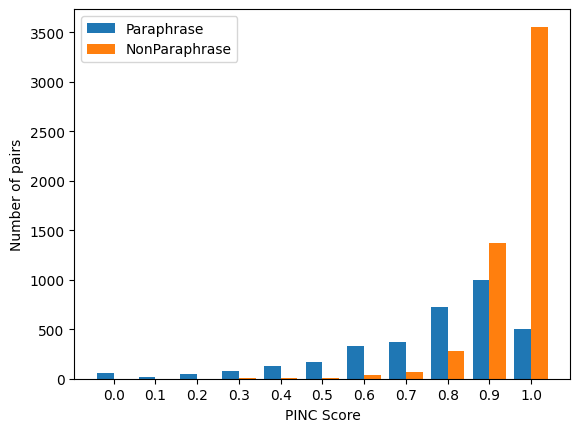

In [ ]:
# Plotting the PINC Score

x = np.arange(11)
y1 = yyi2
y2 = yyi
width = 0.4


plt.ylabel('Number of pairs')
plt.xlabel("PINC Score")
plt.xticks(x, ooi)

Leg = ['Paraphrase', 'NonParaphrase']
plt.legend(loc="upper left")

print("y1 ", y1)
print("y2 ", y2)



plt.bar(x-0.2, y1, width)
plt.bar(x+0.2, y2, width)
plt.legend(Leg,loc=2)
plt.show()





In [ ]:
# Import required libraries
from nltk.translate.bleu_score import SmoothingFunction

# Create lists to store the scores and initialize count variables
tot_score2 = []
count = 0
tot_score3 = []
count2 = 0

# Define a function to calculate PINC score
def calculate_pinc(dataset, tot_score, count):
    for i in range(dataset.shape[0]):
        sentence1 = str(dataset["sentence1"][i])
        sentence2 = str(dataset["sentence2"][i])
        try:
            score = PINC(sentence1, sentence2, 3)
            tot_score.append(score)
            count += 1
        except Exception as e:
            # Handle any exceptions, such as 'illegal' scores
            print(f"Error in calculating score for sample {i}: {e}")

# Calculate PINC scores for the first dataset
calculate_pinc(dataset, tot_score2, count)

# Calculate PINC scores for the second dataset
calculate_pinc(dataset2, tot_score3, count2)

# Remove 'illegal' scores from the lists
tot_score2 = [score for score in tot_score2 if score != 'illegal']
tot_score3 = [score for score in tot_score3 if score != 'illegal']

# Round scores to one decimal place
b = np.round(tot_score2, 1)
b2 = np.round(tot_score3, 1)

# Count unique scores and their occurrences
unique_elements, counts_elements = np.unique(b, return_counts=True)
unique_elements2, counts_elements2 = np.unique(b2, return_counts=True)

# Convert scores and counts to lists
xxi = unique_elements.tolist()
yyi = counts_elements.tolist()
xxi2 = unique_elements2.tolist()
yyi2 = counts_elements2.tolist()

# Convert unique scores to strings
ooi = list(map(str, xxi))
ooi2 = list(map(str, xxi2))

# Insert '0.0' and '0.1' into the lists if not present
if '0.0' not in ooi:
    ooi.insert(0, '0.0')
    yyi.insert(0, 0)
if '0.1' not in ooi:
    ooi.insert(1, '0.1')
    yyi.insert(1, 0)
if '0.0' not in ooi2:
    ooi2.insert(0, '0.0')
    yyi2.insert(0, 0)
if '0.1' not in ooi2:
    ooi2.insert(1, '0.1')
    yyi2.insert(1, 0)


y1  [1, 4, 38, 9, 15, 30, 41, 43, 82, 123, 323, 990, 1473]
y2  [0, 0, 2, 4, 9, 10, 35, 67, 282, 1355, 3518]


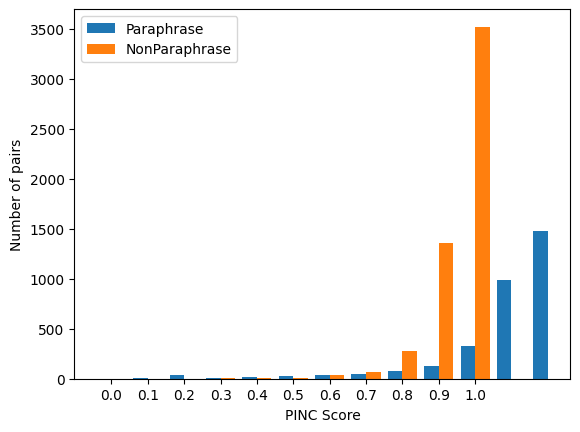

In [ ]:
# Plotting the PINC Score

x1 = np.arange(11)
x2 = np.arange(13)
y1 = yyi2
y2 = yyi
width = 0.4


plt.ylabel('Number of pairs')
plt.xlabel("PINC Score")
plt.xticks(x, ooi)

Leg = ['Paraphrase', 'NonParaphrase']
plt.legend(loc="upper left")

print("y1 ", y1)
print("y2 ", y2)



plt.bar(x2-0.2, y1, width)
plt.bar(x1+0.2, y2, width)
plt.legend(Leg,loc=2)
plt.show()





In [ ]:
! pip install indic-nlp-library

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving te-hi.zip to te-hi.zip
Saving ta-hi.zip to ta-hi.zip
Saving offset_itrans_map.csv to offset_itrans_map.csv
Saving mr-hi.zip to mr-hi.zip
Saving en-hi.zip to en-hi.zip
Saving bn-hi.zip to bn-hi.zip
Saving README.md to README.md


In [ ]:
import os

# Set the INDIC_RESOURCES_PATH environment variable to the uploaded directory
os.environ['INDIC_RESOURCES_PATH'] = '/content/'  # Replace with the actual directory path

# Verify that the environment variable is set
print(os.environ['INDIC_RESOURCES_PATH'])

/content/


In [ ]:
# Dividing the paraphrase and non-paraphrase samples

# dataset0 = pd.concat(map(pd.read_csv, glob.glob(os.path.join('', "*.csv"))))

dataset0 = pd.read_csv("tapaco_whole.csv")

dataset = dataset0.loc[dataset0['label'] == 0]
dataset2 = dataset0.loc[dataset0['label'] == 1]

dataset = dataset.reset_index()
dataset2 = dataset2.reset_index()

# print(dataset.to_markdown())

In [ ]:
from indicnlp import loader
from indicnlp.tokenize import indic_tokenize

def calculate_pinc_score(sentence1, sentence2, N):
    loader.load()  # Load Indic NLP resources

    tokenize_source = indic_tokenize.trivial_tokenize(sentence1)
    tokenize_candidate = indic_tokenize.trivial_tokenize(sentence2)

    if len(tokenize_candidate) == 0 or len(tokenize_source) == 0:
        return 0.0  # Return 0 if either sentence is empty

    if len(tokenize_candidate) < N or len(tokenize_source) < N:
        return 0.0  # Return 0 if either sentence is too short

    sum_score = 0
    for i in range(N):
        n_gram_s = [tuple(tokenize_source[k:k+i+1]) for k in range(len(tokenize_source)-i)]
        n_gram_c = [tuple(tokenize_candidate[k:k+i+1]) for k in range(len(tokenize_candidate)-i)]

        counter = 0
        for element in n_gram_s:
            if element in n_gram_c:
                counter += 1
        sum_score += 1 - counter / len(n_gram_c)

    pinc_score = sum_score / N
    pinc_score = max(0, min(pinc_score, 1))  # Ensure the score is within [0, 1]
    return round(pinc_score, 1)  # Round to the nearest 0.1


def average_and_round_pinc_scores(score1, score2):
    # Calculate the average of the two scores
    average_score = (score1 + score2) / 2.0

    # Round the average score to the nearest 0.1
    rounded_score = round(average_score, 1)

    # Ensure the rounded score is within [0, 1]
    rounded_score = max(0, min(rounded_score, 1))

    return rounded_score


# Example usage
sentence1 = "এটি আরও একটি"
sentence2 = "এটি আরও একটি বাক্য"


In [ ]:
# Calculating the PINC Score

from nltk.translate.bleu_score import SmoothingFunction
smoothie = SmoothingFunction().method7

N_value = 3  # Replace with your desired N-gram value

total_rows = dataset.shape[0]
total_rows2 = dataset2.shape[0]

total_non_para = []
total_para = []

pinc_score = calculate_pinc_score(sentence1, sentence2, N_value)
print("PINC Score:", pinc_score)

pinc_score = calculate_pinc_score(sentence2, sentence1, N_value)
print("PINC Score:", pinc_score)



for i in range(total_rows):

  source_sentence = str(dataset["sentence1"][i])
  candidate_sentence = str(dataset["sentence2"][i])
  modified_pinc_score1 = calculate_pinc_score(source_sentence, candidate_sentence, N_value)
  # total_score1(modified_pinc_score1)
  # print("Modified PINC Score1:", modified_pinc_score1)

  # print()

  modified_pinc_score2 = calculate_pinc_score(candidate_sentence, source_sentence, N_value)
  # total_score2(modified_pinc_score2)
  # print("Modified PINC Score2:", modified_pinc_score2)


  average_rounded_score = average_and_round_pinc_scores(modified_pinc_score1, modified_pinc_score2)
  # print("Average Rounded PINC Score:", average_rounded_score)

  total_non_para.append(average_rounded_score)


for i in range(total_rows2):

  source_sentence = str(dataset2["sentence1"][i])
  candidate_sentence = str(dataset2["sentence2"][i])
  modified_pinc_score1 = calculate_pinc_score(source_sentence, candidate_sentence, N_value)
  # total_score1(modified_pinc_score1)
  # print("Modified PINC Score1:", modified_pinc_score1)

  # print()

  modified_pinc_score2 = calculate_pinc_score(candidate_sentence, source_sentence, N_value)
  # total_score2(modified_pinc_score2)
  # print("Modified PINC Score2:", modified_pinc_score2)


  average_rounded_score = average_and_round_pinc_scores(modified_pinc_score1, modified_pinc_score2)
  # print("Average Rounded PINC Score:", average_rounded_score)

  total_para.append(average_rounded_score)






PINC Score: 0.4
PINC Score: 0


In [ ]:
# Sample list containing values
values_list1 = total_non_para

print(len(values_list1))

# Define the values you want to count
counted_values = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

# Initialize a list to store the counts
counts = [0] * len(counted_values)

# Count the occurrences of each value
for value in values_list1:
    if value in counted_values:
        counts[counted_values.index(value)] += 1

# Create a list of the counted values
counted_numbers = [value for value, count in zip(counted_values, counts) for _ in range(count)]

print(counts)
# print(counted_numbers)
# Print the counts and the list of counted numbers
for value, count in zip(counted_values, counts):
    print(f"{value}: {count} times")

3161
[10, 0, 0, 3, 5, 6, 28, 37, 140, 1182, 1750]
0.0: 10 times
0.1: 0 times
0.2: 0 times
0.3: 3 times
0.4: 5 times
0.5: 6 times
0.6: 28 times
0.7: 37 times
0.8: 140 times
0.9: 1182 times
1.0: 1750 times


In [ ]:
# Sample list containing values
values_list2 = total_para

print(len(values_list2))

# Define the values you want to count
counted_values = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

# Initialize a list to store the counts
counts2 = [0] * len(counted_values)

# Count the occurrences of each value
for value in values_list2:
    if value in counted_values:
        counts2[counted_values.index(value)] += 1

# Create a list of the counted values
counted_numbers2 = [value for value, count2 in zip(counted_values, counts2) for _ in range(count)]

print(counts2)
# print(counted_numbers)
# Print the counts and the list of counted numbers
for value, count in zip(counted_values, counts2):
    print(f"{value}: {count} times")

2020
[0, 2, 4, 74, 270, 171, 446, 159, 460, 429, 5]
0.0: 0 times
0.1: 2 times
0.2: 4 times
0.3: 74 times
0.4: 270 times
0.5: 171 times
0.6: 446 times
0.7: 159 times
0.8: 460 times
0.9: 429 times
1.0: 5 times


In [ ]:
# x1 = np.arange(11)
# x2 = np.arange(11)
# y1 = counts2
# y2 = counts
# width = 0.4


# plt.ylabel('Number of pairs')
# plt.xlabel("PINC Score")
# plt.xticks(x, ooi)

# Leg = ['Paraphrase', 'NonParaphrase']
# plt.legend(loc="upper left")

# print("y1 ", y1)
# print("y2 ", y2)



# plt.bar(x2-0.2, y1, width)
# plt.bar(x1+0.2, y2, width)
# plt.legend(Leg,loc=2)
# plt.show()

y1  [0, 2, 4, 74, 270, 171, 446, 159, 460, 429, 5]
y2  [10, 0, 0, 3, 5, 6, 28, 37, 140, 1182, 1750]


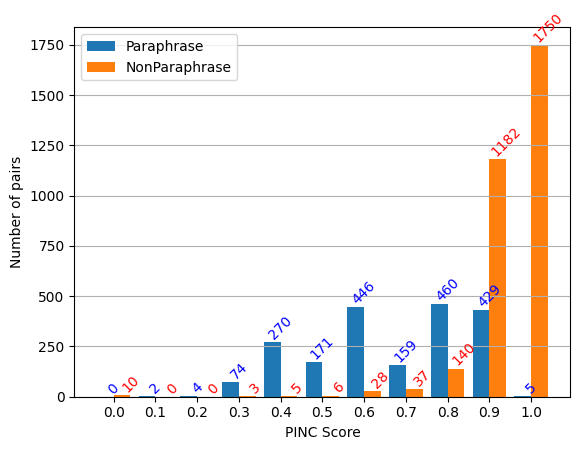

In [ ]:
import matplotlib.pyplot as plt

# Data
x1 = np.arange(11)
x2 = np.arange(11)
y1 = counts2
y2 = counts
width = 0.4

# Labels
plt.ylabel('Number of pairs')
plt.xlabel("PINC Score")
plt.xticks(x1, ooi)  # Use x1 to set the ticks properly

# Legend
Leg = ['Paraphrase', 'NonParaphrase']
plt.legend(Leg, loc="upper left")

# Print data for debugging
print("y1 ", y1)
print("y2 ", y2)

# Create the bar chart
bars = plt.bar(x2 - 0.2, y1, width, label='Paraphrase')
plt.bar(x1 + 0.2, y2, width, label='NonParaphrase')
plt.legend(loc=2)

# Add grid lines
plt.grid(axis='y')  # Add grid lines along the y-axis

# Add numbers on top of each bar with a different color
for x, val in zip(x2, y1):
    plt.text(x, val, str(val), ha='center', va='bottom', color='blue', rotation=45)
for x, val in zip(x1, y2):
    plt.text(x+0.4, val, str(val), ha='center', va='bottom', color='red', rotation=45)

# Save the image as a PNG file
plt.savefig("tapaco_pinc.png", bbox_inches='tight')

# Show the plot
plt.show()

In [ ]:
buet_para = [0, 0, 0, 9, 5, 33, 475, 856, 1524, 518, 6]
non_para = [15, 0, 1, 4, 6, 14, 46, 51, 236, 1979, 3009]
total_sum = sum(buet_para)
print("The sum of indic_para is:", total_sum)

The sum of indic_para is: 3426


In [ ]:
indic_para = [95, 9, 78, 45, 30, 45, 133, 114, 465, 2045, 367 ]
non_para = [15, 0, 1, 4, 6, 14, 46, 51, 236, 1979, 3009]
total_sum = sum(indic_para)
print("The sum of indic_para is:", total_sum)

The sum of indic_para is: 3426


In [ ]:
bnpc_para = [30, 36, 81, 88, 77, 176, 437, 271, 661, 1242, 327]
non_para = [15, 0, 1, 4, 6, 14, 46, 51, 236, 1979, 3009]
total_sum = sum(bnpc_para)
print("The sum of indic_para is:", total_sum)

The sum of indic_para is: 3426


In [ ]:
tapaco_para = [0, 2, 4, 74, 270, 171, 446, 159, 460, 429, 5]
tapaco_non_para = [10, 0, 0, 3, 5, 6, 28, 37, 140, 1182, 1750]
total_sum = sum(tapaco_non_para)
print("The sum of indic_para is:", total_sum)

The sum of indic_para is: 3161


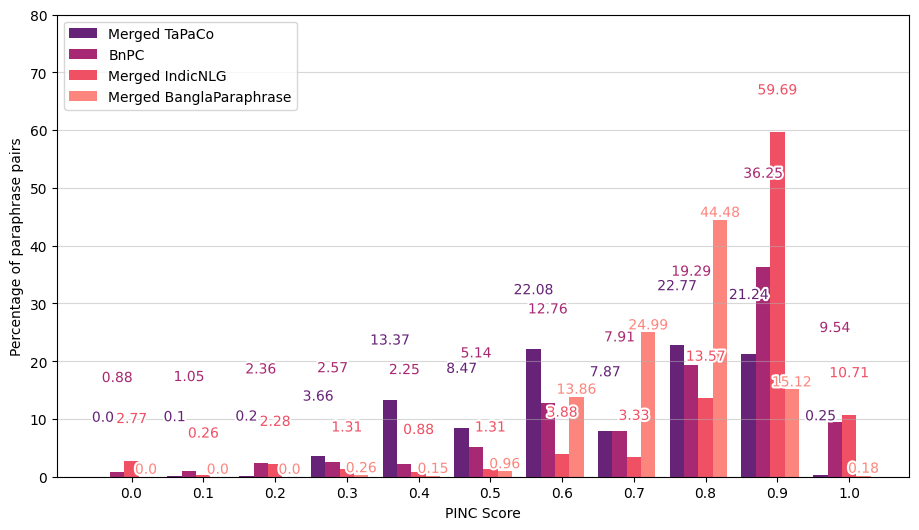

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patheffects import withStroke

# Data
x_labels = [str(i/10) for i in range(11)]
x2 = np.arange(11)
tapaco_para = [0, 2, 4, 74, 270, 171, 446, 159, 460, 429, 5]
bnpc_para = [30, 36, 81, 88, 77, 176, 437, 271, 661, 1242, 327]
indic_para = [95, 9, 78, 45, 30, 45, 133, 114, 465, 2045, 367]
buet_para = [0, 0, 0, 9, 5, 33, 475, 856, 1524, 518, 6]

# Divide and multiply the data and round to two decimal places
tapaco_para = [round((val / 2020) * 100, 2) for val in tapaco_para]
bnpc_para = [round((val / 3426) * 100, 2) for val in bnpc_para]
indic_para = [round((val / 3426) * 100, 2) for val in indic_para]
buet_para = [round((val / 3426) * 100, 2) for val in buet_para]

# Define colors for bars and values
bar_colors = ['#662377', '#a82973', '#ef5064', '#fc867d']
value_colors = bar_colors
labels = ['Merged TaPaCo', 'BnPC', 'Merged IndicNLG', 'Merged BanglaParaphrase']

# Values to set different heights for each bar
heights = [9, 15, 6, 0]

# Create the bar chart with specified colors and labels
plt.figure(figsize=(11, 6))
bar_width = 0.2

plt.grid(axis='y', alpha=0.5)
for i, data in enumerate([tapaco_para, bnpc_para, indic_para, buet_para]):
    x_coords = x2 - 0.4 + i * bar_width
    plt.bar(x_coords, data, width=bar_width, color=bar_colors[i], label=labels[i])

    for x_coord, y_val in zip(x_coords, data):
        # Increase the border width with a white edge
        plt.text(x_coord, y_val + heights[i], str(y_val), ha='center', va='bottom', color=value_colors[i], path_effects=[withStroke(linewidth=3, foreground='white')])

# Set the y-limit to 80 (changed from 2500 for better display)
plt.ylim(0, 80)

# Labels and Legend
plt.ylabel('Percentage of paraphrase pairs')
plt.xlabel('PINC Score')
plt.xticks(x2, x_labels)

# Move the legend to the upper left
plt.legend(loc='upper left')

# Save the plot as an SVG file
plt.savefig('pinc_all_dataset_percentage.svg', format='svg')

# Show the plot
plt.show()


In [ ]:
'''
BUET 0.6-0.9 -> 98.45
BUET  0.8 -> 44.48

Indic 0.6-0.9 -> 80.47
Indic 0.9 -> 59.69

BnPC 0.6-0.9 -> 76.21
BnPC 0.9 -> 36.25

TaPaCo 0.6-0.9 -> 73.96
TaPaCo 0.9 ->
'''